In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import requests
import time
import datetime

In [2]:
data = pd.read_csv("US Dept Education data/Output/Cleaned 2013_2014.csv")

In [3]:
data.head(2)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID,Proportion of faculty that is full-time,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Average age of entry,Average family income in real 2015 dollars,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Nat Log Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),"Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion)",Unnamed: 14,Unnamed: 15
0,1002,0.8989,823,0.8856,0.6314,29500.0,20.540410,29598.38641,27200,29700,34300,10.442901,18888.0,0.2914,NaN,NaN
1,1004,0.8729,1070,0.5951,0.7365,22500.0,21.791473,53709.14341,27000,31600,36000,10.491274,20194.0,0.4493,NaN,NaN


In [4]:
data.columns

Index(['6-digit OPE ID for institution',
       'Admission rate for all campuses rolled up to the 6-digit OPE ID',
       'Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID',
       'Proportion of faculty that is full-time',
       'First-time, full-time student retention rate at four-year institutions',
       'The median debt for students who have completed',
       'Average age of entry', 'Average family income in real 2015 dollars',
       'Mean earnings of students working and not enrolled 6 years after entry',
       'Mean earnings of students working and not enrolled 8 years after entry',
       'Mean earnings of students working and not enrolled 10 years after entry',
       'Nat Log Mean earnings of students working and not enrolled 10 years after entry',
       'Average cost of attendance (academic year institutions)',
       'Completion rate for first-time, full-time students at four-year institutions (150% of expected time to

#### Drop blank columns

In [5]:
data = data.drop(["Unnamed: 14", 'Unnamed: 15'], axis=1)

#### Move all independant (X) variables to the left (for neatness)

In [6]:
xyz=['6-digit OPE ID for institution',
       'Admission rate for all campuses rolled up to the 6-digit OPE ID',
       'Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID',
       'Proportion of faculty that is full-time',
       'First-time, full-time student retention rate at four-year institutions',
       'The median debt for students who have completed',
       'Average age of entry', 'Average family income in real 2015 dollars',
    'Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion)','Mean earnings of students working and not enrolled 6 years after entry',
       'Mean earnings of students working and not enrolled 8 years after entry',
       'Mean earnings of students working and not enrolled 10 years after entry',
       'Nat Log Mean earnings of students working and not enrolled 10 years after entry',
       'Average cost of attendance (academic year institutions)']
data = data[xyz]
data.head(2)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID,Proportion of faculty that is full-time,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Average age of entry,Average family income in real 2015 dollars,"Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion)",Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Nat Log Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions)
0,1002,0.8989,823,0.8856,0.6314,29500.0,20.540410,29598.38641,0.2914,27200,29700,34300,10.442901,18888.0
1,1004,0.8729,1070,0.5951,0.7365,22500.0,21.791473,53709.14341,0.4493,27000,31600,36000,10.491274,20194.0


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
X = data[['Admission rate for all campuses rolled up to the 6-digit OPE ID',\
                     'Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID',\
                     'Proportion of faculty that is full-time',\
                     'First-time, full-time student retention rate at four-year institutions',\
                     'The median debt for students who have completed',\
                     'Average age of entry',\
                     'Average family income in real 2015 dollars',\
         'Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion)']]

y = data['Mean earnings of students working and not enrolled 10 years after entry']


In [9]:
print(X.shape, y.shape)

(1268, 8) (1268,)


In [10]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Examine coefficients and Intercept

In [11]:
print(model.coef_)
print(model.intercept_)

[-9.81400420e+03  4.28222275e+01 -2.89905016e+03  1.83750904e+04
 -1.90696438e-01  4.36044294e+02  1.04849345e-01  5.89157967e+03]
-17728.606259561573


#### Check p-values for each coefficient

In [12]:
import statsmodels.api as sm
from scipy import stats

In [13]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                                       OLS Regression Results                                                      
Dep. Variable:     Mean earnings of students working and not enrolled 10 years after entry   R-squared:                       0.589
Model:                                                                                 OLS   Adj. R-squared:                  0.586
Method:                                                                      Least Squares   F-statistic:                     225.3
Date:                                                                     Sat, 27 Jul 2019   Prob (F-statistic):          1.08e-236
Time:                                                                             08:27:12   Log-Likelihood:                -13305.
No. Observations:                                                                     1268   AIC:                         2.663e+04
Df Residuals:                                                               

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Reject any X coefficients with p-values >= 5%

In [14]:
data = data.drop(["Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion)"], axis=1)

In [15]:
data.head(2)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID,Proportion of faculty that is full-time,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Average age of entry,Average family income in real 2015 dollars,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Nat Log Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions)
0,1002,0.8989,823,0.8856,0.6314,29500.0,20.540410,29598.38641,27200,29700,34300,10.442901,18888.0
1,1004,0.8729,1070,0.5951,0.7365,22500.0,21.791473,53709.14341,27000,31600,36000,10.491274,20194.0


In [16]:
X = data[['Admission rate for all campuses rolled up to the 6-digit OPE ID',\
                     'Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID',\
                     'Proportion of faculty that is full-time',\
                     'First-time, full-time student retention rate at four-year institutions',\
                     'The median debt for students who have completed',\
                     'Average age of entry',\
                     'Average family income in real 2015 dollars']]

In [17]:
X.head(2)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID,Proportion of faculty that is full-time,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Average age of entry,Average family income in real 2015 dollars
0,0.8989,823,0.8856,0.6314,29500.0,20.540410,29598.38641
1,0.8729,1070,0.5951,0.7365,22500.0,21.791473,53709.14341


In [18]:
print(X.shape, y.shape)

(1268, 7) (1268,)


#### See if colinearity warning is still in place;

In [19]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                                       OLS Regression Results                                                      
Dep. Variable:     Mean earnings of students working and not enrolled 10 years after entry   R-squared:                       0.588
Model:                                                                                 OLS   Adj. R-squared:                  0.585
Method:                                                                      Least Squares   F-statistic:                     256.6
Date:                                                                     Sat, 27 Jul 2019   Prob (F-statistic):          2.94e-237
Time:                                                                             08:27:12   Log-Likelihood:                -13306.
No. Observations:                                                                     1268   AIC:                         2.663e+04
Df Residuals:                                                               

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
print(model.coef_)
print(model.intercept_)

[-1.01151028e+04  4.52018338e+01 -2.91794255e+03  2.17040114e+04
 -1.86915885e-01  4.37815171e+02  1.19935301e-01]
-20448.77947608228


#### Check for colinearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
# check the dependant variable y
variables_endogenous = est2.model.endog
variables_endogenous

array([34300, 36000, 29500, ..., 53100, 85700, 46100], dtype=int64)

In [24]:
variables_exogenous = est2.model.exog
variables_exogenous

array([[1.00000000e+00, 8.98900000e-01, 8.23000000e+02, ...,
        2.95000000e+04, 2.05404101e+01, 2.95983864e+04],
       [1.00000000e+00, 8.72900000e-01, 1.07000000e+03, ...,
        2.25000000e+04, 2.17914729e+01, 5.37091434e+04],
       [1.00000000e+00, 5.12500000e-01, 8.30000000e+02, ...,
        3.12000000e+04, 2.06485753e+01, 2.81124651e+04],
       ...,
       [1.00000000e+00, 4.63000000e-01, 1.12500000e+03, ...,
        3.12370000e+04, 2.70508259e+01, 3.91686607e+04],
       [1.00000000e+00, 6.63500000e-01, 1.22500000e+03, ...,
        2.70000000e+04, 2.17170264e+01, 7.69563501e+04],
       [1.00000000e+00, 6.44300000e-01, 9.54000000e+02, ...,
        1.50000000e+04, 2.35467512e+01, 4.59535420e+04]])

In [25]:
vif = [variance_inflation_factor(variables_exogenous, i) for i in range(variables_exogenous.shape[1])]
vif 

[438.7362671684371,
 1.2304022773203342,
 4.005656825674626,
 1.0403331958266897,
 2.725102236533551,
 1.3543499227760865,
 1.5790516094469864,
 3.181462607967563]

In [26]:
X.corr()

,Admission rate for all campuses rolled up to the 6-digit OPE ID,Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID,Proportion of faculty that is full-time,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Average age of entry,Average family income in real 2015 dollars
Admission rate for all campuses rolled up to the 6-digit OPE ID,1.000000,-0.383117,-0.038612,-0.284319,0.189326,0.147779,-0.141847
Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID,-0.383117,1.000000,0.126192,0.777505,-0.266950,-0.400375,0.702049
Proportion of faculty that is full-time,-0.038612,0.126192,1.000000,0.049544,-0.045678,-0.141676,0.078323
"First-time, full-time student retention rate at four-year institutions",-0.284319,0.777505,0.049544,1.000000,-0.170558,-0.412488,0.652252
The median debt for students who have completed,0.189326,-0.266950,-0.045678,-0.170558,1.000000,-0.119571,0.118647
Average age of entry,0.147779,-0.400375,-0.141676,-0.412488,-0.119571,1.000000,-0.585724
Average family income in real 2015 dollars,-0.141847,0.702049,0.078323,0.652252,0.118647,-0.585724,1.000000


In [27]:
X.columns

Index(['Admission rate for all campuses rolled up to the 6-digit OPE ID',
       'Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID',
       'Proportion of faculty that is full-time',
       'First-time, full-time student retention rate at four-year institutions',
       'The median debt for students who have completed',
       'Average age of entry', 'Average family income in real 2015 dollars'],
      dtype='object')

#### As the 1st VIF term is for the intercept, 'Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID'
#### and 'Average family income in real 2015 dollars' have a high colinearity to the other variables'

In [28]:
data = data.drop(["Average SAT equivalent score of students admitted for all campuses rolled up to the 6-digit OPE ID",\
                 'Average family income in real 2015 dollars'], axis=1)

In [29]:
data.shape

(1268, 11)

In [30]:
data.head(2)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,Proportion of faculty that is full-time,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Average age of entry,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Nat Log Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions)
0,1002,0.8989,0.8856,0.6314,29500.0,20.540410,27200,29700,34300,10.442901,18888.0
1,1004,0.8729,0.5951,0.7365,22500.0,21.791473,27000,31600,36000,10.491274,20194.0


In [31]:
X = data[['Admission rate for all campuses rolled up to the 6-digit OPE ID',\
                     'Proportion of faculty that is full-time',\
                     'First-time, full-time student retention rate at four-year institutions',\
                     'The median debt for students who have completed',\
                     'Average age of entry']]

In [32]:
X.head(2)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,Proportion of faculty that is full-time,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Average age of entry
0,0.8989,0.8856,0.6314,29500.0,20.540410
1,0.8729,0.5951,0.7365,22500.0,21.791473


In [33]:
print(X.shape, y.shape)

(1268, 5) (1268,)


In [34]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                                       OLS Regression Results                                                      
Dep. Variable:     Mean earnings of students working and not enrolled 10 years after entry   R-squared:                       0.476
Model:                                                                                 OLS   Adj. R-squared:                  0.474
Method:                                                                      Least Squares   F-statistic:                     229.2
Date:                                                                     Sat, 27 Jul 2019   Prob (F-statistic):          3.61e-174
Time:                                                                             08:27:12   Log-Likelihood:                -13459.
No. Observations:                                                                     1268   AIC:                         2.693e+04
Df Residuals:                                                               

#### multicolinearity seems fine as below but p-values for 'Proportion of faculty that is full-time' & 'Average age of entry' are now too high;

In [35]:
variables_exogenous = est2.model.exog
variables_exogenous

array([[1.00000000e+00, 8.98900000e-01, 8.85600000e-01, 6.31400000e-01,
        2.95000000e+04, 2.05404101e+01],
       [1.00000000e+00, 8.72900000e-01, 5.95100000e-01, 7.36500000e-01,
        2.25000000e+04, 2.17914729e+01],
       [1.00000000e+00, 5.12500000e-01, 6.64100000e-01, 6.21900000e-01,
        3.12000000e+04, 2.06485753e+01],
       ...,
       [1.00000000e+00, 4.63000000e-01, 9.87300000e-01, 7.42400000e-01,
        3.12370000e+04, 2.70508259e+01],
       [1.00000000e+00, 6.63500000e-01, 5.10400000e-01, 7.56300000e-01,
        2.70000000e+04, 2.17170264e+01],
       [1.00000000e+00, 6.44300000e-01, 4.74100000e-01, 7.81400000e-01,
        1.50000000e+04, 2.35467512e+01]])

In [36]:
vif = [variance_inflation_factor(variables_exogenous, i) for i in range(variables_exogenous.shape[1])]
vif 

[332.38937257913733,
 1.1180846933290667,
 1.025456859687224,
 1.3393338267594672,
 1.111418181273601,
 1.2941954784683753]

In [37]:
X.corr()

,Admission rate for all campuses rolled up to the 6-digit OPE ID,Proportion of faculty that is full-time,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Average age of entry
Admission rate for all campuses rolled up to the 6-digit OPE ID,1.000000,-0.038612,-0.284319,0.189326,0.147779
Proportion of faculty that is full-time,-0.038612,1.000000,0.049544,-0.045678,-0.141676
"First-time, full-time student retention rate at four-year institutions",-0.284319,0.049544,1.000000,-0.170558,-0.412488
The median debt for students who have completed,0.189326,-0.045678,-0.170558,1.000000,-0.119571
Average age of entry,0.147779,-0.141676,-0.412488,-0.119571,1.000000


In [38]:
data = data.drop(["Proportion of faculty that is full-time",\
                 'Average age of entry'], axis=1)

In [39]:
data.head(2)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Nat Log Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions)
0,1002,0.8989,0.6314,29500.0,27200,29700,34300,10.442901,18888.0
1,1004,0.8729,0.7365,22500.0,27000,31600,36000,10.491274,20194.0


In [40]:
data.shape

(1268, 9)

In [41]:
X = data[['Admission rate for all campuses rolled up to the 6-digit OPE ID',\
                     'First-time, full-time student retention rate at four-year institutions',\
                     'The median debt for students who have completed']]

In [42]:
X.head(2)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed
0,0.8989,0.6314,29500.0
1,0.8729,0.7365,22500.0


In [43]:
print(X.shape, y.shape)

(1268, 3) (1268,)


#### All now looks fine although the R2 value for the model has dropped as independant variables have been removed;

In [44]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                                       OLS Regression Results                                                      
Dep. Variable:     Mean earnings of students working and not enrolled 10 years after entry   R-squared:                       0.475
Model:                                                                                 OLS   Adj. R-squared:                  0.474
Method:                                                                      Least Squares   F-statistic:                     381.0
Date:                                                                     Sat, 27 Jul 2019   Prob (F-statistic):          3.15e-176
Time:                                                                             08:27:12   Log-Likelihood:                -13460.
No. Observations:                                                                     1268   AIC:                         2.693e+04
Df Residuals:                                                               

In [45]:
variables_exogenous = est2.model.exog
variables_exogenous

array([[1.0000e+00, 8.9890e-01, 6.3140e-01, 2.9500e+04],
       [1.0000e+00, 8.7290e-01, 7.3650e-01, 2.2500e+04],
       [1.0000e+00, 5.1250e-01, 6.2190e-01, 3.1200e+04],
       ...,
       [1.0000e+00, 4.6300e-01, 7.4240e-01, 3.1237e+04],
       [1.0000e+00, 6.6350e-01, 7.5630e-01, 2.7000e+04],
       [1.0000e+00, 6.4430e-01, 7.8140e-01, 1.5000e+04]])

In [46]:
vif = [variance_inflation_factor(variables_exogenous, i) for i in range(variables_exogenous.shape[1])]
vif 

[110.20988338511967,
 1.1126757966642684,
 1.1049353256445367,
 1.0533723543911735]

In [47]:
X.corr()

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed
Admission rate for all campuses rolled up to the 6-digit OPE ID,1.000000,-0.284319,0.189326
"First-time, full-time student retention rate at four-year institutions",-0.284319,1.000000,-0.170558
The median debt for students who have completed,0.189326,-0.170558,1.000000


#### Examine non linearity

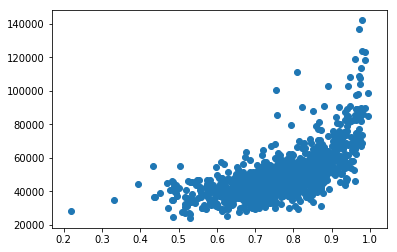

In [48]:
x = data['First-time, full-time student retention rate at four-year institutions']
plt.scatter(x, y)

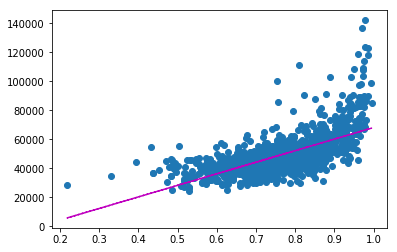

r-squared: 0.4275666698843749
p value: 1.4946790789365566e-155
Standard Error: 2591.6089346997223
Slope: 79694.02957275405
Intercept: -11568.289325622296


In [49]:
from scipy.stats import linregress

(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, intercept + slope*x, 'm--')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)
print("Slope:", slope)
print("Intercept:", intercept)

#### See if Nat Log (y) is a better fit on the primary coefficient

In [50]:
# remove nat log (y) if it exists so nat log column so process is explanined
data = data.drop(['Nat Log Mean earnings of students working and not enrolled 10 years after entry'], axis=1)
data.head(2)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions)
0,1002,0.8989,0.6314,29500.0,27200,29700,34300,18888.0
1,1004,0.8729,0.7365,22500.0,27000,31600,36000,20194.0


In [51]:
y = data['Nat Log Mean earnings of students working and not enrolled 10 years after entry'] = \
np.log(data['Mean earnings of students working and not enrolled 10 years after entry'])
data.head(2)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry
0,1002,0.8989,0.6314,29500.0,27200,29700,34300,18888.0,10.442901
1,1004,0.8729,0.7365,22500.0,27000,31600,36000,20194.0,10.491274


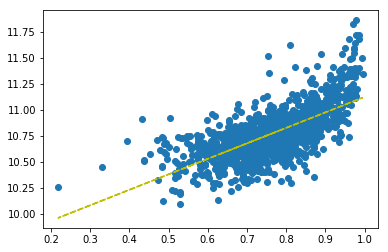

r-squared: 0.4738782229016678
p value: 9.120924220247462e-179
Standard Error: 0.04414122631302584
Slope: 1.4905669366510956
Intercept: 9.635181449582785


In [52]:
y = data['Nat Log Mean earnings of students working and not enrolled 10 years after entry']
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, intercept + slope*x, 'y--')

# #plt.savefig("../Images/Injuries vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)
print("Slope:", slope)
print("Intercept:", intercept)

In [53]:
y.head(2)

0    10.442901
1    10.491274
Name: Nat Log Mean earnings of students working and not enrolled 10 years after entry, dtype: float64

### Ploting with all X coefficients

In [54]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
print(model.coef_)
print(model.intercept_)

[-1.61691171e-01  1.38619781e+00 -4.04653024e-06]
9.911792191714731


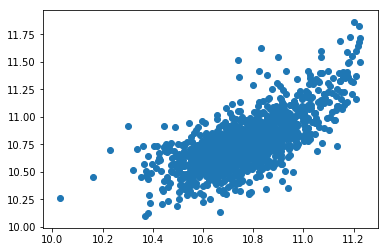

In [56]:
plt.scatter(model.predict(X),y)

### Stats Check
#### In Excel MSE is Residual Sum of Squares / (n - df) whereas in sklearn it's ResdidualSS / n
#### R2 = RegressionSS / TotalSS
#### where ResidualSS = sum{(y - y predicted)^2}, RegressionSS = sum{(y - average(y))^2}, TotalSS = ResidualSS + RegressionSS

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ** Alternate mechanisms to generate R2 **
# score = model.score(X, y)
# print(f"R2 Score: {score}")
# model.score(X, y)

Mean Squared Error (MSE): 0.029425714326452662
R-squared (R2 ): 0.4962477769774357


#### Root Mean Squared Error can be considered the standard deviation of of the residual or unexplained variance:

In [58]:
RSME = np.sqrt(mse)
RSME

0.1715392501046121

### Check for normality

In [59]:
X.head(2)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed
0,0.8989,0.6314,29500.0
1,0.8729,0.7365,22500.0


In [60]:
y.head(2)

0    10.442901
1    10.491274
Name: Nat Log Mean earnings of students working and not enrolled 10 years after entry, dtype: float64

Text(0.5, 1.0, 'Model1 Residuals Probability Plot')

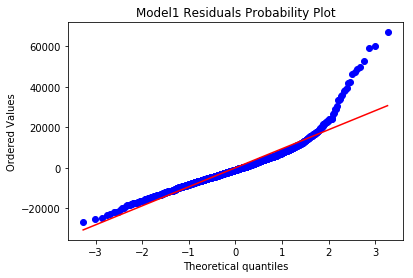

In [61]:
stats.probplot(est2.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")

#### Model's residuals largely follow a normal distribrution but lets make some checks;

#### The Kolmogorov-Smirnov test is close to significant (not what we want);

In [62]:
stats.kstest(est2.resid, 'norm')

KstestResult(statistic=0.5583596214511041, pvalue=0.0)

#### But the good fit indicates that normality is a reasonable approximation

In [63]:
# fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(est2.resid, plot=ax, fit=True)
r**2

0.9030628337054458

In [64]:
# stats.probplot(data['Admission rate for all campuses rolled up to the 6-digit OPE ID'], dist="norm", plot=plt)
# plt.show()

In [65]:
# stats.probplot(data['First-time, full-time student retention rate at four-year institutions'], dist="norm", plot=plt)
# plt.show()

In [66]:
# stats.probplot(data['The median debt for students who have completed'], dist="norm", plot=plt)
# plt.show()

In [67]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                                           OLS Regression Results                                                          
Dep. Variable:     Nat Log Mean earnings of students working and not enrolled 10 years after entry   R-squared:                       0.496
Model:                                                                                         OLS   Adj. R-squared:                  0.495
Method:                                                                              Least Squares   F-statistic:                     415.1
Date:                                                                             Sat, 27 Jul 2019   Prob (F-statistic):          1.27e-187
Time:                                                                                     08:27:13   Log-Likelihood:                 436.20
No. Observations:                                                                             1268   AIC:                            -864.4
Df Residuals:       

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### R2 has improved
#### Durbin-Watson close to 2 implies limited auto correlation (as this is not time series data)
#### Skew < +/- 2 and Kurtosis isn't as steep as previously

### Residuals, Standardized and Studentized Residuals

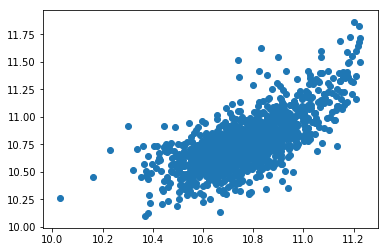

In [68]:
# repeat of plt.scatter(model.predict(X),y)
predictions = model.predict(X)
plt.scatter(predictions,y)

##### Plot Residuals

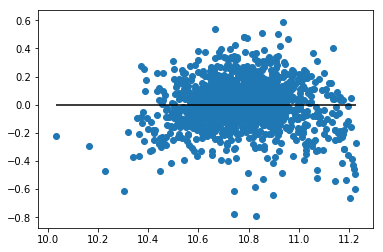

In [69]:
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

### Examine Residuals

#### Standardized Residual = Residual(i) / SQRT (MSE(1 - leverage)
#### Leverage = distance of point from the mean value
#### However Standardized Residual in Excel = Residual(i) / SQRT(MSE) where MSE is calculated as ResidualSS/(n-1)
#### but the Excel MSE calculated via the Data Analysis Tool Pak = ResidualSS/(n-1 - degrees of freedom)

In [70]:
# from statsmodels fit linear model to cleaned and nat log adjusted etc dataset
initial = sm.OLS(y, X2)
results = initial.fit()

In [71]:
# create instance of influence
influence = results.get_influence()

##### Leverage = distance of point from the centre of the data or mean value

In [72]:
# leverage (hat values)
leverage = influence.hat_matrix_diag
leverage

array([0.00371804, 0.00212193, 0.00546777, ..., 0.00478422, 0.00139067,
       0.00341497])

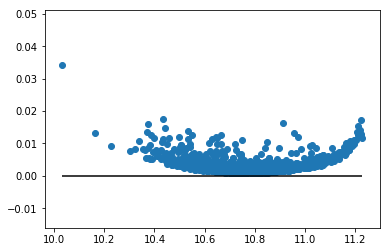

In [73]:
plt.scatter(predictions, leverage)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

##### Cooks distance summarizes how much all the values in the regression model change when the ith observation is removed

##### Typically better than Leverage in determining outliers

In [74]:
# Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance
cooks_d

(array([0.0002001 , 0.00079034, 0.0034792 , ..., 0.00080515, 0.00446668,
        0.00024393]),
 array([0.99999992, 0.99999875, 0.99997586, ..., 0.9999987 , 0.99996027,
        0.99999988]))

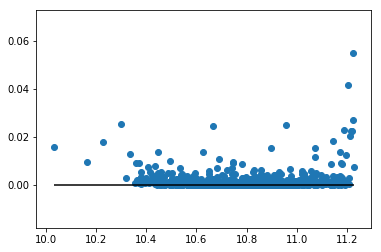

In [75]:
plt.scatter(predictions, cooks_d[0])
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

#### Standardized Residual (see explanation above)

In [76]:
standardized_residuals = influence.resid_studentized_internal
standardized_residuals

array([-0.46311543, -1.21929645, -1.59101453, ...,  0.81850688,
        3.58185982, -0.53361146])

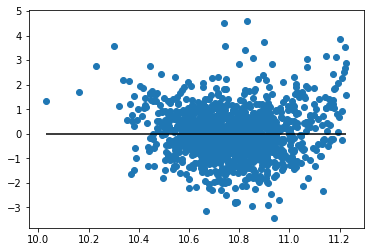

In [77]:
plt.scatter(predictions, standardized_residuals)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

#### Studentized Residual
##### Standardized residuals use the mean square error for the model based on all observations, MSE, while studentized residuals use the mean square error based on the estimated model with the ith observation deleted, MSE(i)
#### Studentized Residual along with Cook's D better for outlier identification
#### If Studentized Residual > 3, data point can be considered an outlier

In [78]:
studentized_residuals = influence.resid_studentized_external
studentized_residuals

array([-0.46297148, -1.21953144, -1.59197992, ...,  0.81839995,
        3.59875309, -0.53346043])

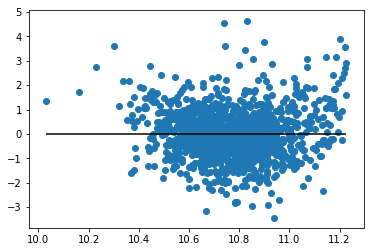

In [79]:
plt.scatter(predictions, studentized_residuals)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

### Make Dataframe with outlier column identifiers included

In [80]:
data.head(2)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry
0,1002,0.8989,0.6314,29500.0,27200,29700,34300,18888.0,10.442901
1,1004,0.8729,0.7365,22500.0,27000,31600,36000,20194.0,10.491274


In [81]:
data['Leverage'] = leverage
data['Cooks Distance'] = cooks_d[0]
data['Standardized Residuals'] = standardized_residuals
data['Studentized Residuals'] = studentized_residuals

In [82]:
data.head(2)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
0,1002,0.8989,0.6314,29500.0,27200,29700,34300,18888.0,10.442901,0.003718,0.00020,-0.463115,-0.462971
1,1004,0.8729,0.7365,22500.0,27000,31600,36000,20194.0,10.491274,0.002122,0.00079,-1.219296,-1.219531


In [83]:
leverage_df = data.sort_values("Leverage", ascending=False)
leverage_df.head(10)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
223,1685,0.9299,0.2182,7819.0,26700,24900,28500,33966.0,10.257659,0.034244,0.015797,1.334939,1.335353
771,3026,0.3328,0.5279,38097.0,21400,23500,27200,17380.0,10.210972,0.017684,0.007831,-1.319099,-1.319486
437,2155,0.0584,0.9706,6000.0,96800,119900,136700,57950.0,11.825544,0.017229,0.054756,3.534618,3.550812
1243,20758,0.8667,0.9375,39500.0,42800,42900,46400,50373.0,10.745055,0.016217,0.003926,-0.976003,-0.975985
560,2489,0.2218,0.4360,26100.0,27900,33200,36500,28754.0,10.505068,0.015964,0.002373,0.764936,0.764810
722,2920,0.1342,0.9720,6420.5,88200,100800,108900,59528.0,11.598185,0.015404,0.020123,2.268207,2.271938
1261,31019,0.4847,0.4717,11204.0,22300,29700,30400,16752.0,10.322198,0.014827,0.001855,-0.702242,-0.702101
622,2627,0.0741,0.9757,8674.0,73700,88000,113900,55430.0,11.643076,0.014251,0.022526,2.496466,2.501653
14,1044,0.4300,0.6123,38500.0,22600,30300,29500,24744.0,10.292146,0.013849,0.007128,-1.424814,-1.425396
69,1173,0.1392,0.9749,8085.0,44700,66200,70500,57014.0,11.163368,0.013618,0.000236,-0.261403,-0.261306


In [84]:
cooks_df = data.sort_values("Cooks Distance", ascending=False)
cooks_df.head(30)

,6-digit OPE ID for institution,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
437,2155,0.0584,0.9706,6000.0,96800,119900,136700,57950.0,11.825544,0.017229,0.054756,3.534618,3.550812
442,2178,0.0815,0.9788,13000.0,100800,130000,142100,57010.0,11.864286,0.010965,0.041538,3.871260,3.892876
90,1305,0.0569,0.9858,11110.0,95200,128700,122900,58408.0,11.719126,0.012770,0.027187,2.899524,2.908064
476,2246,0.7263,0.4333,23068.5,43700,53200,54900,17823.0,10.913269,0.007815,0.025152,3.573850,3.590623
350,1955,0.3401,0.8107,5720.0,24900,30800,36100,30396.0,10.494048,0.013268,0.024783,-2.715215,-2.722091
543,2433,0.1386,0.6273,22813.0,19200,22500,25100,14466.0,10.130623,0.009928,0.024645,-3.135361,-3.146380
914,3378,0.1224,0.9778,14935.0,89000,107300,123600,59600.0,11.724806,0.009192,0.022937,3.144769,3.155895
622,2627,0.0741,0.9757,8674.0,73700,88000,113900,55430.0,11.643076,0.014251,0.022526,2.496466,2.501653
133,1426,0.0705,0.9867,11472.0,74600,95200,118400,59320.0,11.681824,0.012248,0.022507,2.694454,2.701156
722,2920,0.1342,0.9720,6420.5,88200,100800,108900,59528.0,11.598185,0.015404,0.020123,2.268207,2.271938


In [85]:
data.set_index('6-digit OPE ID for institution', inplace=True)
data.head(2)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
6-digit OPE ID for institution,,,,,,,,,,,,
1002,0.8989,0.6314,29500.0,27200,29700,34300,18888.0,10.442901,0.003718,0.00020,-0.463115,-0.462971
1004,0.8729,0.7365,22500.0,27000,31600,36000,20194.0,10.491274,0.002122,0.00079,-1.219296,-1.219531


In [86]:
#data.loc[:, ['Admission rate for all campuses rolled up to the 6-digit OPE ID']].head()
#list(data.index.values)

In [87]:
cooks_df = data.sort_values("Cooks Distance", ascending=False)
cooks_df.head(30)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
6-digit OPE ID for institution,,,,,,,,,,,,
2155,0.0584,0.9706,6000.0,96800,119900,136700,57950.0,11.825544,0.017229,0.054756,3.534618,3.550812
2178,0.0815,0.9788,13000.0,100800,130000,142100,57010.0,11.864286,0.010965,0.041538,3.871260,3.892876
1305,0.0569,0.9858,11110.0,95200,128700,122900,58408.0,11.719126,0.012770,0.027187,2.899524,2.908064
2246,0.7263,0.4333,23068.5,43700,53200,54900,17823.0,10.913269,0.007815,0.025152,3.573850,3.590623
1955,0.3401,0.8107,5720.0,24900,30800,36100,30396.0,10.494048,0.013268,0.024783,-2.715215,-2.722091
2433,0.1386,0.6273,22813.0,19200,22500,25100,14466.0,10.130623,0.009928,0.024645,-3.135361,-3.146380
3378,0.1224,0.9778,14935.0,89000,107300,123600,59600.0,11.724806,0.009192,0.022937,3.144769,3.155895
2627,0.0741,0.9757,8674.0,73700,88000,113900,55430.0,11.643076,0.014251,0.022526,2.496466,2.501653
1426,0.0705,0.9867,11472.0,74600,95200,118400,59320.0,11.681824,0.012248,0.022507,2.694454,2.701156


#### Remove Outliers from Cook's Distance with values > 0.01

In [88]:
data=data.drop([2155,2178,1305,2246,1955,2433,3378,2627,1426,2920,1445,1401,1685,2165,2121,3151,1587,2707,3663,2573,3242,2439], axis=0)

In [89]:
data.shape

(1246, 12)

In [90]:
studentized_df = data.sort_values("Studentized Residuals", ascending=False)
studentized_df.head(10)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
6-digit OPE ID for institution,,,,,,,,,,,,
2885,0.634000,0.8097,25000.0,97400,106800,111500,40718.00000,11.621780,0.001150,0.006113,4.608068,4.645430
2044,0.653600,0.7537,27000.0,80100,92900,100300,23673.00000,11.515921,0.001392,0.007087,4.509787,4.544714
37243,0.663500,0.7563,27000.0,60400,64800,85700,37848.00000,11.358608,0.001391,0.004467,3.581860,3.598753
1134,0.748000,0.8214,26000.0,78900,79300,90500,22223.00000,11.413105,0.001809,0.005332,3.430398,3.445115
2181,0.772600,0.8500,27000.0,70900,83200,87900,22420.00000,11.383955,0.002665,0.006329,3.077687,3.088062
3353,0.563500,0.8799,27000.0,73400,86200,91100,49327.00000,11.419713,0.002664,0.005414,2.847480,2.855527
2853,0.639600,0.7933,26940.5,63400,67500,79700,21493.00000,11.286025,0.001527,0.003077,2.836658,2.844604
2001,0.877500,0.5977,27000.0,46600,51700,54500,36843.00000,10.905956,0.003269,0.004841,2.429751,2.434482
1329,0.726500,0.8656,24500.0,61600,74500,81400,52406.00000,11.307131,0.002058,0.002971,2.400778,2.405318


In [91]:
studentized_df.shape

(1246, 12)

#### Remove Outliers from Studentized Residuals with values > 3

In [92]:
data=data.drop([2885,2044,37243,1134,2181], axis=0)

In [93]:
data.shape

(1241, 12)

In [94]:
cooks_df2 = data.sort_values("Cooks Distance", ascending=False)
cooks_df2.head(10)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
6-digit OPE ID for institution,,,,,,,,,,,,
2424,0.2272,0.5296,27776.0,22100,24700,26600,17758.0,10.188666,0.012020,0.009901,-1.804267,-1.805881
3147,0.7182,0.3313,22500.0,28200,32100,34700,26400.0,10.454495,0.013184,0.009685,1.702830,1.704112
3011,0.2548,0.7105,27000.0,20900,28600,30400,32485.0,10.322198,0.006210,0.009575,-2.475725,-2.480767
3703,0.9087,0.4853,18750.0,38800,44300,45700,33668.0,10.729854,0.007864,0.009170,2.151190,2.154286
1170,0.1173,0.9622,12000.0,56400,78800,97800,60065.0,11.490680,0.010645,0.009001,1.829285,1.830986
1579,0.4103,0.6762,8748.5,55200,64700,63300,7715.0,11.055641,0.010930,0.008991,1.803981,1.805593
2942,0.7122,0.5296,39635.0,20600,25700,24200,25050.0,10.094108,0.013451,0.008934,-1.618941,-1.619981
2711,0.1556,0.9677,11750.0,68400,81700,98400,59572.0,11.496796,0.010200,0.008821,1.850362,1.852141
12580,0.9886,0.8125,23890.0,27000,31200,29700,28581.0,10.298902,0.004398,0.008755,-2.815434,-2.823187


In [95]:
studentized_df2 = data.sort_values("Studentized Residuals", ascending=False)
studentized_df2.head(10)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
6-digit OPE ID for institution,,,,,,,,,,,,
3353,0.563500,0.8799,27000.0,73400,86200,91100,49327.00000,11.419713,0.002664,0.005414,2.847480,2.855527
2853,0.639600,0.7933,26940.5,63400,67500,79700,21493.00000,11.286025,0.001527,0.003077,2.836658,2.844604
2001,0.877500,0.5977,27000.0,46600,51700,54500,36843.00000,10.905956,0.003269,0.004841,2.429751,2.434482
1329,0.726500,0.8656,24500.0,61600,74500,81400,52406.00000,11.307131,0.002058,0.002971,2.400778,2.405318
1479,0.781387,0.7410,23750.0,49300,59500,67200,37269.33333,11.115429,0.001232,0.001664,2.323247,2.327302
1468,0.878500,0.6184,20471.0,43700,51200,56400,37090.00000,10.940224,0.003489,0.004669,2.309421,2.313393
1348,0.374300,0.9189,26000.0,72900,80400,90500,29091.00000,11.413105,0.004234,0.005593,2.293817,2.297697
2782,0.740700,0.7208,25000.0,48000,55400,64900,39014.00000,11.080603,0.001116,0.001445,2.274514,2.278282
3256,0.815000,0.8644,25556.0,54300,64300,77400,53831.00000,11.256742,0.002939,0.003652,2.226141,2.229636


In [96]:
X = data[['Admission rate for all campuses rolled up to the 6-digit OPE ID',\
                     'First-time, full-time student retention rate at four-year institutions',\
                     'The median debt for students who have completed']]
y = data['Nat Log Mean earnings of students working and not enrolled 10 years after entry']

In [97]:
print(X.shape, y.shape)

(1241, 3) (1241,)


In [98]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
print(model.coef_)
print(model.intercept_)

[-1.23445746e-01  1.35595763e+00 -2.39608420e-06]
9.863510837390347


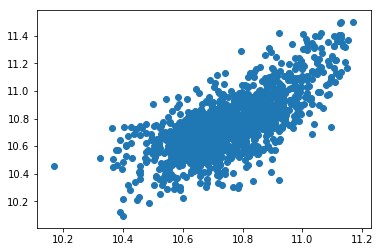

In [100]:
predictions = model.predict(X)
plt.scatter(predictions,y)

In [101]:
# predictions.sort()
# predictions_df = pd.DataFrame(predictions,y)
# predictions_df.head()

In [102]:
# data.loc[data['Nat Log Mean earnings of students working and not enrolled 10 years after entry'] > 10.44]

##### check model

In [103]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                                           OLS Regression Results                                                          
Dep. Variable:     Nat Log Mean earnings of students working and not enrolled 10 years after entry   R-squared:                       0.504
Model:                                                                                         OLS   Adj. R-squared:                  0.503
Method:                                                                              Least Squares   F-statistic:                     419.1
Date:                                                                             Sat, 27 Jul 2019   Prob (F-statistic):          8.41e-188
Time:                                                                                     08:27:15   Log-Likelihood:                 556.29
No. Observations:                                                                             1241   AIC:                            -1105.
Df Residuals:       

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [104]:
influence2 = est2.get_influence()

In [105]:
cooks_d2 = influence2.cooks_distance
cooks_d2

(array([0.00038648, 0.00100607, 0.0046061 , ..., 0.00071897, 0.00106376,
        0.00018549]),
 array([0.9999997 , 0.99999798, 0.99995776, ..., 0.99999897, 0.99999774,
        0.99999993]))

In [106]:
print(len(X), len(X2), len(y), len(cooks_d2[0]))

1241 1241 1241 1241


In [107]:
print(len(predictions), len(model.predict(X)))

1241 1241


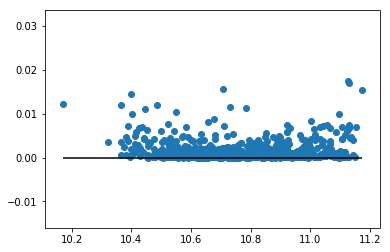

In [108]:
plt.scatter(predictions, cooks_d2[0])
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

### Final Stats
#### In Excel MSE is Residual Sum of Squares / (n - df) whereas in sklearn it's ResdidualSS / n
#### R2 = RegressionSS / TotalSS
#### where ResidualSS = sum{(y - y predicted)^2}, RegressionSS = sum{(y - average(y))^2}, TotalSS = ResidualSS + RegressionSS

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ** Alternate mechanisms to generate R2 **
# score = model.score(X, y)
# print(f"R2 Score: {score}")
# model.score(X, y)

Mean Squared Error (MSE): 0.023887598927459272
R-squared (R2 ): 0.5040562563810138


#### Root Mean Squared Error can be considered the standard deviation of of the residual or unexplained variance:

In [110]:
RSME = np.sqrt(mse)
RSME

0.1545561351983779

### Check for normality again

In [111]:
X.head(2)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed
6-digit OPE ID for institution,,,
1002,0.8989,0.6314,29500.0
1004,0.8729,0.7365,22500.0


In [112]:
y.head(2)

6-digit OPE ID for institution
1002    10.442901
1004    10.491274
Name: Nat Log Mean earnings of students working and not enrolled 10 years after entry, dtype: float64

Text(0.5, 1.0, 'Model2 Residuals Probability Plot')

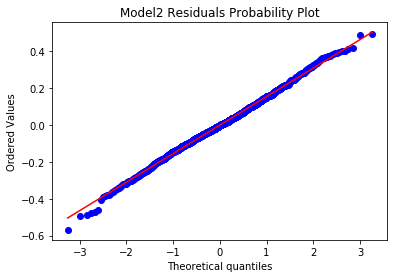

In [113]:
stats.probplot(est2.resid, plot= plt)
plt.title("Model2 Residuals Probability Plot")

#### The Kolmogorov-Smirnov test is not significant

In [114]:
stats.kstest(est2.resid, 'norm')

KstestResult(statistic=0.3553356333182224, pvalue=1.0405978979550108e-140)

#### the fit has improved considerably;

In [115]:
# fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(est2.resid, plot=ax, fit=True)
r**2

0.997999518234634

### We can conclude that the Model's residuals largely follow a normal distribrution

#### Train Test

In [116]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [117]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5150485881111923
Testing Score: 0.4638553761441042


Text(0.5, 1.0, 'Residual Plot')

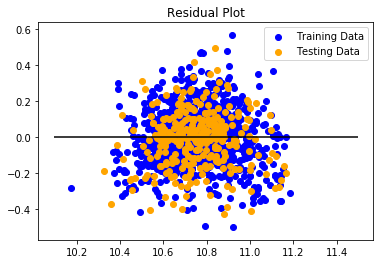

In [118]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [119]:
# R2 for test data
Test_R2 = model.score(X_test, y_test)
Test_R2

0.4638553761441042

In [120]:
# MSE for test data
Test_MSE = np.mean((model.predict(X_test) - y_test)**2)
Test_MSE

0.023989552764775546

In [121]:
# RSME
Test_RSME = np.sqrt(Test_MSE)
Test_RSME

0.1548856118713922

In [122]:
Test_coeff = model.coef_
Test_coeff

array([-1.53121688e-01,  1.33899732e+00, -2.77014165e-06])

In [123]:
Test_intercept = model.intercept_
Test_intercept

9.901811812115735

In [124]:
X_train.shape

(930, 3)

In [125]:
X_test.shape

(311, 3)

#### Add Ouput column to dataframe using exponential (y)

In [126]:
data['Predicted LN'] = predictions
data.head(2)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted LN
6-digit OPE ID for institution,,,,,,,,,,,,,
1002,0.8989,0.6314,29500.0,27200,29700,34300,18888.0,10.442901,0.003718,0.00020,-0.463115,-0.462971,10.538013
1004,0.8729,0.7365,22500.0,27000,31600,36000,20194.0,10.491274,0.002122,0.00079,-1.219296,-1.219531,10.700506


In [127]:
data['Predicted 10 year earnings'] = np.exp(data['Predicted LN'])
data.head(2)

,Admission rate for all campuses rolled up to the 6-digit OPE ID,"First-time, full-time student retention rate at four-year institutions",The median debt for students who have completed,Mean earnings of students working and not enrolled 6 years after entry,Mean earnings of students working and not enrolled 8 years after entry,Mean earnings of students working and not enrolled 10 years after entry,Average cost of attendance (academic year institutions),Nat Log Mean earnings of students working and not enrolled 10 years after entry,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted LN,Predicted 10 year earnings
6-digit OPE ID for institution,,,,,,,,,,,,,,
1002,0.8989,0.6314,29500.0,27200,29700,34300,18888.0,10.442901,0.003718,0.00020,-0.463115,-0.462971,10.538013,37722.522894
1004,0.8729,0.7365,22500.0,27000,31600,36000,20194.0,10.491274,0.002122,0.00079,-1.219296,-1.219531,10.700506,44378.302427


#### Make descending plots of Actual vs Predicted

In [140]:
# data.reset_index()

#### Repeat for Tuition Costs